<a href="https://colab.research.google.com/github/juhumkwon/source_code/blob/main/9_1%EA%B0%95(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 70s 85ms/step - accuracy: 0.8525 - loss: 0.4794 - val_accuracy: 0.9788 - val_loss: 0.0701
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 64s 62ms/step - accuracy: 0.9813 - loss: 0.0580 - val_accuracy: 0.9850 - val_loss: 0.0475
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 60ms/step - accuracy: 0.9897 - loss: 0.0333 - val_accuracy: 0.9874 - val_loss: 0.0477
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 61ms/step - accuracy: 0.9905 - loss: 0.0289 - val_accuracy: 0.9889 - val_loss: 0.0422
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 60ms/step - accuracy: 0.9928 - loss: 0.0229 - val_accuracy: 0.9895 - val_loss: 0.0379
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9871 - loss: 0.0386
Test accuracy: 0.9904999732971191


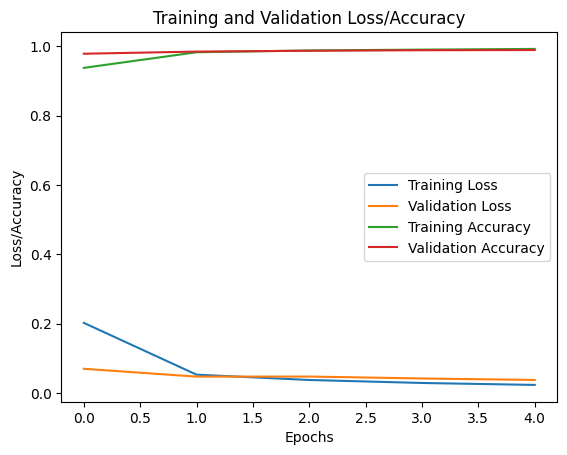

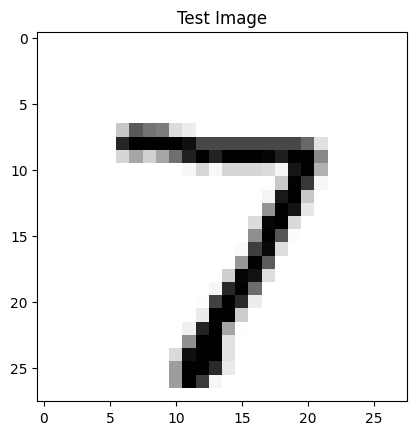

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Predicted Label: 7
True Label: 7


In [1]:
# TensorFlow와 Keras를 사용하기 위해 라이브러리 임포트
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# MNIST 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 형태 변경: (batch_size, height, width, channels)
# MNIST는 2D 이미지이므로 채널을 추가합니다.
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255.0
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255.0

# 레이블을 정수형으로 유지합니다.
print("Train data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

# CNN 모델 정의
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # 10개 클래스

# 모델 요약 출력
model.summary()

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

# 훈련 과정에서의 손실 및 정확도 시각화
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Loss/Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

# 예측할 이미지 선택
n = 0  # 0번 이미지를 선택
plt.imshow(x_test[n].reshape(28, 28), cmap='Greys')
plt.title('Test Image')
plt.show()

# 모델 예측
predicted_class = model.predict(x_test[n].reshape(1, 28, 28, 1))
predicted_label = tf.argmax(predicted_class, axis=1).numpy()[0]
print('Predicted Label:', predicted_label)
print('True Label:', y_test[n])
